# Reinforcement Learning

<img src="images/RL.png" width=400>


<b>Agent:</b> A cute robot. The goal of the agent is to pick the best policy that will maximize the total rewards received from the environment.
<img src="images/walle.png" width=100>

<b>Environment:</b> The world the Agent interacts with.

<b>State:</b>  $S(t)$ The current configuration of the environment.

<b>Action:</b> $A(t)$ Things agent can do that will affect its state.

<b>Reward:</b> $R(t)$ Result of the action. Can be negative or positive. Represents how good the action was. 

<b>Policy:</b> Final working strategy the Agent identifies. A function that takes the current environment state to return an action.
$\pi(s): S -> R$

<b>Episode:</b> Represents one run of the game. The Agent learns across many epizodes. # of episodes used to train is a hyperparameter. 

<b>Terminal State:</b> End state after an episode.

Where $t$ is time-step t.

An action durring a state results in a reward for that action and a new updated state.
$S(t), A(t) -> R(t+1),S(t+1)$
This is also represented by a 4-tuple with the notation $(s, a, r, s')$.



<b>Value Function:</b> $V(S)$ the value of a state that considers future rewards as well as immediate rewards. It is the value of a state that takes into account the probability of all possible future rewards. 
Each state will have a value that is based on all possible future rewards.  Tells you how valueable being in a state is by taking into consideration possible future rewards. 
$V(S) = E(all future rewards | S(t)=s)$

<b>Attribution</b> How to attribute rewards to actions such that long term rewards are considered. 

<b>Total Discounted Reward</b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

class TicTacToe():
    def __init__(self, eps, V1=None, V2=None, plots=True):
        self.p1_actions = []
        self.p2_actions = []
        self.past_actions = []
        self.winner = None
        self.V1 = V1
        self.V2 = V2
        self.eps = eps
        self.plots = plots
        self.player_turn = None
        if self.plots == True:
            self.drawboard()
            
    def play(self):
        
        check_game = self.game_over()
        while not check_game:
            self.player_turn="p1"
            self.update_board()
            check_game = self.game_over()
            if not check_game:
                self.player_turn="p2"
                self.update_board()
                check_game = self.game_over()
            else:
                return 
        else:
            return
    
    def drawboard(self):
        try:
            for i in range(len(self.p1_actions)):
                plt.plot(self.p1_actions[i][0], self.p1_actions[i][1], 'ro', color="red")
        except:
            plt.plot([], 'ro', color="red")
        try:
            for i in range(len(self.p2_actions)):
                plt.plot(self.p2_actions[i][0], self.p2_actions[i][1], 'v', color="blue")
        except:
             plt.plot([], 'v', color="blue")
                
        plt.xlim([0, 6])
        plt.ylim([0, 6])
        plt.axvline(x=2, color="black")
        plt.axvline(x=4, color="black")
        plt.axhline(y=2, color="black")
        plt.axhline(y=4, color="black")

    
    def update_state(self, state):
        
        #select action
        new_x, new_y = self.get_next_coordinates()
        while ((new_x, new_y) in self.past_actions):
            new_x, new_y = self.get_next_coordinates()
        
        #update state with action
        else:
            state.append((new_x,new_y))
            self.past_actions.append((new_x,new_y))
            
        return state
    
    def get_next_coordinates(self):
        r = np.random.rand()
        #explore
        #randomly select a point on the board
        if r < self.eps:
            new_x = np.random.choice([1, 3, 5], 1)[0]
            new_y = np.random.choice([1, 3, 5], 1)[0]
        #exploit
        #select a point on the board according to value function V
        else:
            #remove points already played
            if self.player_turn == "p1":
                self.V1[~self.V1.index.isin(self.past_actions)]
                #select best point remaining
                new_x = self.V1.idxmax()[0][0]
                new_y = self.V1.idxmax()[0][1]
            else:
                self.V2[~self.V2.index.isin(self.past_actions)]
                #select best point remaining
                new_x = self.V2.idxmax()[0][0]
                new_y = self.V2.idxmax()[0][1]
        return new_x, new_y


    def update_board(self):
        
        if self.player_turn == "p1":
            self.p1_actions = self.update_state(self.p1_actions)
        else:
            self.p2_actions = self.update_state(self.p2_actions) 
        
        if self.plots == True:
            self.drawboard()
            display(plt)
            clear_output(wait = True)
            plt.pause(0.5)
        
    def game_over(self):
    
        #diagonal wins
        diagonal_win_a = [(1, 5), (3, 3), (5, 1)]
        if (set(diagonal_win_a) <= set(self.p1_actions)):
            self.winner = "p1"
            return True
        if (set(diagonal_win_a) <= set(self.p2_actions)):
            self.winner = "p2"
            return True
        diagonal_win_b = [(5, 1), (3, 3), (1, 5)]
        if (set(diagonal_win_b) <= set(self.p1_actions)):
            self.winner = "p1"
            return True
        if (set(diagonal_win_b) <= set(self.p2_actions)):
            self.winner = "p2"
            return True
            
        
        #vertical wins
        vertical_win_a = [(1,1), (1,3), (1,5)]
        vertical_win_b = [(3,1), (3,3), (3,5)]
        vertical_win_c = [(5,1), (5,3), (5,5)]
        if (set(vertical_win_a) <= set(self.p1_actions)):
            self.winner = "p1"
            return True
        if (set(vertical_win_a) <= set(self.p2_actions)):
            self.winner = "p2"
            return True
        if (set(vertical_win_b) <= set(self.p1_actions)):
            self.winner = "p1"
            return True
        if (set(vertical_win_b) <= set(self.p2_actions)):
            self.winner = "p2"
            return True
        if (set(vertical_win_c) <= set(self.p1_actions)):
            self.winner = "p1"
            return True
        if (set(vertical_win_c) <= set(self.p2_actions)):
            self.winner = "p2"
            return True

    
        #horizontal wins
        horizontal_win_a = [(1,1), (3,1), (5,1)]
        horizontal_win_b = [(1,3), (3,3), (5,3)]
        horizontal_win_c = [(1,5), (3,5), (5,5)]
        if (set(horizontal_win_a) <= set(self.p1_actions)):
            self.winner = "p1"
            return True
        if (set(horizontal_win_a) <= set(self.p2_actions)):
            self.winner = "p2"
            return True
        if (set(horizontal_win_b) <= set(self.p1_actions)):
            self.winner = "p1"
            return True
        if (set(horizontal_win_b) <= set(self.p2_actions)):
            self.winner = "p2"
            return True
        if (set(horizontal_win_c) <= set(self.p1_actions)):
            self.winner = "p1"
            return True
        if (set(horizontal_win_c) <= set(self.p2_actions)):
            self.winner = "p2"
            return True
        
        
        if len(self.past_actions) >= 9:
            return True
        
        else: 
            return False


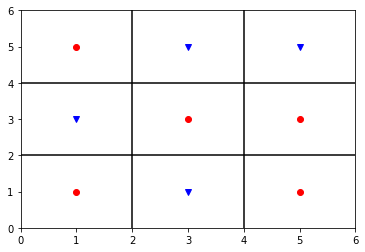

In [2]:
eps = 1
game = TicTacToe(eps=1)
game.play()

In [3]:
class Cute_Robot():
    '''Agent class that plays TicTacToe episodes to learn a policy. 
    Uses Epsilon Greedy.'''
    
    def __init__(self, player, alpha):
        self.alpha = alpha # learning rate
        self.player = player
        self.V = self.init_V()
        self.actions = None
        self.winner = None
    
    
    def init_V(self): 
        '''Initialize value function based on outcome of one initial game.
        Value function is a function of all possible states.
        Im using places on the board as statees isntead of all possible configurations of the board for simplicity.'''

        game = TicTacToe(eps=1, plots=False)
        game.play()
        
        V = pd.DataFrame([0.5]*9, index=[(1,1), (1,3), (1,5), (3,1), (3,3), (3,5), (5,1), (5,3), (5,5)]) 
        
        if game.winner == self.player:
            V = pd.DataFrame([1]*9, index=[(1,1), (1,3), (1,5), (3,1), (3,3), (3,5), (5,1), (5,3), (5,5)])

        if (game.winner != None) and (game.winner != self.player): 
            V = pd.DataFrame([0]*9, index=[(1,1), (1,3), (1,5), (3,1), (3,3), (3,5), (5,1), (5,3), (5,5)])

        return V

    def update_value_function(self):
        '''backprob through state history to calc the value function.
        v(s) = v(s) + alpha(v(s')-v(s))
        '''
        reward = 0.5
        if self.winner == self.player:
            reward = 1
        if (self.winner != None) and (self.winner != self.player):
            reward = 0

        target = reward

        for prev in reversed(self.actions):
            value = self.V.loc[[prev]][0][0] + self.alpha*(target - self.V.loc[[prev]][0][0])
            self.V.loc[[prev]] = value
            target = value

        
  

In [4]:
#Play two agents against eachother so each one learns a value function.

# initialize the agents
Agent_1 = Cute_Robot(alpha=0.5, player="p1")
Agent_2 = Cute_Robot(alpha=0.5, player="p2")


#play some episodes
T = 1000
eps = 0.5
for t in range(T):
    #play a game
    game = TicTacToe(V1=Agent_1.V, V2=Agent_2.V, eps=eps, plots=False)
    game.play()
    #update Agent's states
    Agent_1.actions = game.p1_actions
    Agent_1.winner = game.winner
    Agent_2.actions = game.p2_actions
    Agent_2.winner = game.winner
    #update Agent's value functions
    Agent_1.update_value_function()
    Agent_2.update_value_function()


In [5]:
Agent_1.V

,0
"(1, 1)",0.592875
"(1, 3)",0.542990
"(1, 5)",0.749371
"(3, 1)",0.579017
"(3, 3)",0.424163
"(3, 5)",0.748032
"(5, 1)",0.679286
"(5, 3)",0.540169
"(5, 5)",0.747896


In [6]:
Agent_2.V

,0
"(1, 1)",0.163480
"(1, 3)",0.386499
"(1, 5)",0.373980
"(3, 1)",0.260334
"(3, 3)",0.283148
"(3, 5)",0.376796
"(5, 1)",0.379136
"(5, 3)",0.360837
"(5, 5)",0.322933
